In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
# Load Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
# --------- STEP 1: Utility Functions ---------
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def detect_faces(gray_image):
    return face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    interWidth = max(0, xB - xA)
    interHeight = max(0, yB - yA)
    interArea = interWidth * interHeight

    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    unionArea = boxAArea + boxBArea - interArea

    iou = interArea / float(unionArea) if unionArea > 0 else 0
    return iou

def draw_boxes(image, faces, ground_truth_box):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Draw ground truth
    cv2.rectangle(image, (ground_truth_box[0], ground_truth_box[1]),
                  (ground_truth_box[0] + ground_truth_box[2], ground_truth_box[1] + ground_truth_box[3]),
                  (0, 255, 0), 2)
    return image


In [4]:
# --------- STEP 2: Main Process Function ---------
def process_face_detection(image, ground_truth_box):
    gray = convert_to_grayscale(image)
    faces = detect_faces(gray)

    if len(faces) > 0:
        detected_box = faces[0]
        iou_score = calculate_iou(detected_box, ground_truth_box)

        # Calculate localization error
        error = np.linalg.norm(np.array(detected_box[:2]) - np.array(ground_truth_box[:2]))
        error_percentage = (error / max(ground_truth_box[2], ground_truth_box[3])) * 100

        image_with_boxes = draw_boxes(image.copy(), faces, ground_truth_box)
        cv2_imshow(image_with_boxes)

        print(f"IoU Score: {iou_score:.4f}")
        print(f"Localization Error: {error_percentage:.2f}%")
    else:
        print("No faces detected.")

Saving Man.jpg to Man (5).jpg
Enter ground truth bounding box coordinates (x, y, width, height):
x (top-left): 212
y (top-left): 28
width: 150
height: 150


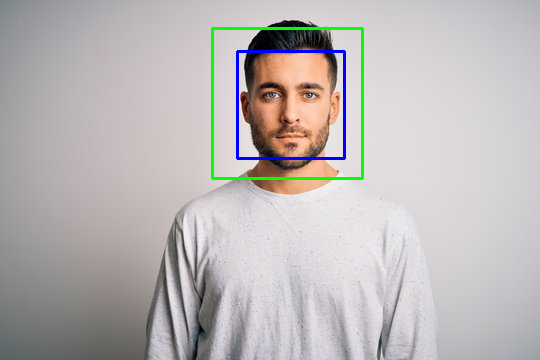

IoU Score: 0.5088
Localization Error: 22.65%


In [10]:
# --------- STEP 3: Upload and Call ---------
uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

# Prompt user to enter ground truth bounding box
print("Enter ground truth bounding box coordinates (x, y, width, height):")
x = int(input("x (top-left): "))
y = int(input("y (top-left): "))
w = int(input("width: "))
h = int(input("height: "))

ground_truth_box = [x, y, w, h]

# Call the process
process_face_detection(image, ground_truth_box)